In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

In [3]:
intermediate_dir = "..\\intermediate\\"
data_dir = "..\\data\\"
today="20250402"

In [4]:
df = pd.read_csv(f"{intermediate_dir}{today}agg_smart_chr.csv")
#df = df.drop(columns=["physical_access", "adult_sti", "adult_excessive_drinking"])

In [5]:
df.columns[::-1]

Index(['v045_rawvalue', 'v067_numerator', 'v063_rawvalue', 'v062_numerator',
       'v082_numerator', 'v023_numerator', 'v069_numerator', 'v070_numerator',
       'v060_rawvalue', 'v049_rawvalue', 'v011_rawvalue', 'v009_rawvalue',
       'v052_rawvalue', 'v051_rawvalue', 'Data_value_unit', 'Data_value',
       'Sample_Size', 'cbsacode', 'Year'],
      dtype='object')

In [6]:
rename_dict = {
    'v009_rawvalue': 'adult_smoking',
    'v011_rawvalue': 'adult_obesity',
    'v045_rawvalue': 'sti',
    'v049_rawvalue': 'excessive_drinking',
    'v051_rawvalue': 'population_raw',
    'v052_rawvalue': 'under_18_pct',
    'v060_rawvalue': 'diabetes_prevalence',
    'v070_numerator': 'no_leisure_time_activity',
    'v069_numerator': 'some_college',
    'v023_numerator': 'unemployment',
    'v082_numerator': 'children_single_parent',
    'v062_numerator': 'mental_health_providers',
    'v063_rawvalue': 'median_household_income',
    'v067_numerator': 'driving_alone_to_work'
}

df = df.rename(columns=rename_dict)


In [7]:
df

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti
0,2011,10740,2880,21.78,%,857903.0,211769.371000,123687.787094,135700.693621,85547.993919,38302.509293,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8
1,2020,10740,1088,19.38,%,915927.0,202255.000171,111266.454433,173594.906960,117863.312052,53458.421988,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1
2,2019,10740,1016,16.87,%,910726.0,204493.000009,101728.220196,169008.339998,115075.252617,57659.758999,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2
3,2018,10740,1308,18.17,%,909906.0,207204.999990,101205.181580,158576.491002,114501.104879,56426.485001,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8
4,2017,10740,1440,22.02,%,907301.0,208968.999992,112905.592342,156051.673002,97792.854210,53530.420001,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,117781.869004,157248.045005,127031.754004,53032.674002,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0
872,2012,49340,601,19.26,%,803701.0,189673.436000,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5
873,2011,49340,468,17.60,%,803701.0,189673.436000,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2
874,2021,49340,302,20.31,%,830622.0,173394.999992,115771.049543,185995.241002,145142.335681,60464.884001,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6


In [8]:
    # 'v009', # adult smoking #--
    # 'v011', # adult obesity #--
    # 'v045', # sti #--xx
    # 'v049', # excessive drinking #--xx
    # 'v051', # pop raw #
    # 'v052', # Percentage of population below 18 years of age. #
    # 'v060',  # diabetes prevalence #--
    # #'v132' # Percentage of population with adequate access to locations for physical activity #
    # 'v070', #--xx Percentage of adults age 18 and over reporting no leisure-time physical activity (age-adjusted).
    # 'v069', # some college
    # 'v023', # unemployment
    # 'v082', # children in single-parent households
    # 'v062', # mental health providers
    # 'v063', # median household income
    # 'v067'#, # driving alone to work

In [9]:
df.columns

Index(['Year', 'cbsacode', 'Sample_Size', 'Data_value', 'Data_value_unit',
       'population_raw', 'under_18_pct', 'adult_smoking', 'adult_obesity',
       'excessive_drinking', 'diabetes_prevalence', 'no_leisure_time_activity',
       'some_college', 'unemployment', 'children_single_parent',
       'mental_health_providers', 'median_household_income',
       'driving_alone_to_work', 'sti'],
      dtype='object')

In [10]:
# print(df[df.columns[2:]].isna().sum())  # Check NaN counts
# print(np.isinf(df[df.columns[2:]]).sum())  # Check Inf counts
df[df.columns[5:]] = df[df.columns[5:]].replace([np.inf, -np.inf], np.nan)

# Drop rows where any of the selected columns contain NaN
# df = df.dropna(subset=df.columns[5:])
#print(np.isinf(df[df.columns[2:]]).sum()) 
df[df.columns[5:]]

,population_raw,under_18_pct,adult_smoking,adult_obesity,excessive_drinking,diabetes_prevalence,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti
0,857903.0,211769.371000,123687.787094,135700.693621,85547.993919,38302.509293,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8
1,915927.0,202255.000171,111266.454433,173594.906960,117863.312052,53458.421988,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1
2,910726.0,204493.000009,101728.220196,169008.339998,115075.252617,57659.758999,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2
3,909906.0,207204.999990,101205.181580,158576.491002,114501.104879,56426.485001,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8
4,907301.0,208968.999992,112905.592342,156051.673002,97792.854210,53530.420001,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,801227.0,184567.999979,117781.869004,157248.045005,127031.754004,53032.674002,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0
872,803701.0,189673.436000,120963.430108,156577.028820,123419.540364,52806.370504,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5
873,803701.0,189673.436000,123419.540364,149208.698052,122191.485236,50350.260248,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2
874,830622.0,173394.999992,115771.049543,185995.241002,145142.335681,60464.884001,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6


## pca

In [11]:
df.columns

Index(['Year', 'cbsacode', 'Sample_Size', 'Data_value', 'Data_value_unit',
       'population_raw', 'under_18_pct', 'adult_smoking', 'adult_obesity',
       'excessive_drinking', 'diabetes_prevalence', 'no_leisure_time_activity',
       'some_college', 'unemployment', 'children_single_parent',
       'mental_health_providers', 'median_household_income',
       'driving_alone_to_work', 'sti'],
      dtype='object')

In [12]:
# 'v009', # adult smoking #--
# 'v011', # adult obesity #--
# 'v060',  # diabetes prevalence #--

In [13]:
numeric_cols1 = ['adult_smoking', 'adult_obesity', 'diabetes_prevalence']
col_keep = [i for i in df.columns if i not in numeric_cols1]


scaler = StandardScaler()
df_scaled1 = scaler.fit_transform(df[numeric_cols1]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled1)
pca1 = PCA(n_components=1)#
principal_component1 = pca1.fit_transform(df_scaled1)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.06% of the variance.


In [14]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


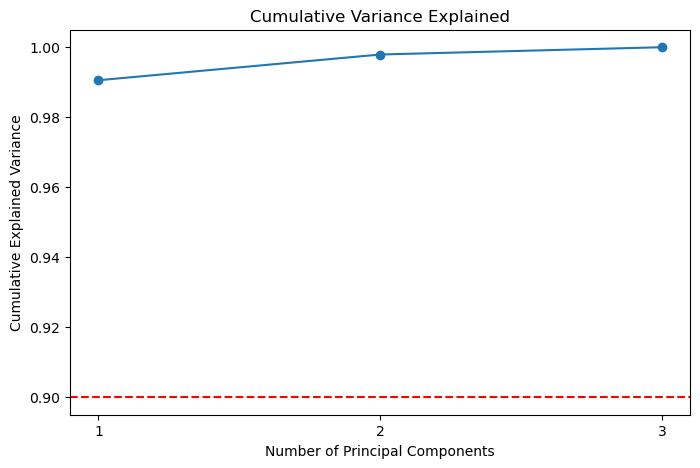

In [15]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [16]:
df_pca_1 = pca.transform(df_scaled1)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_1, np.zeros((df_pca_1.shape[0], df_scaled1.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled1 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0094


In [17]:
df_scaled1

array([[-0.38915988, -0.5165461 , -0.5132418 ],
       [-0.42637763, -0.45010428, -0.44242149],
       [-0.45495682, -0.45814614, -0.42278955],
       ...,
       [-0.38996362, -0.49286184, -0.45694526],
       [-0.41288062, -0.42836215, -0.4096818 ],
       [-0.46818749, -0.39247968, -0.44028148]])

In [18]:
principal_component1

array([[-8.19401799e-01],
       [-7.61499788e-01],
       [-7.71278974e-01],
       [-7.86093166e-01],
       [-7.76275879e-01],
       [-7.31347829e-01],
       [-6.68511777e-01],
       [-7.86130897e-01],
       [-7.98099697e-01],
       [-7.90381793e-01],
       [-8.14354240e-01],
       [-7.41608987e-01],
       [-1.04517396e+00],
       [-1.04521163e+00],
       [-1.04256138e+00],
       [-1.04988596e+00],
       [-1.04787271e+00],
       [-1.02712153e+00],
       [-1.01827421e+00],
       [-1.05301894e+00],
       [-1.04909825e+00],
       [-1.05635099e+00],
       [-1.03745101e+00],
       [-1.02958603e+00],
       [ 1.94759253e+00],
       [ 2.02762087e+00],
       [ 2.47615532e+00],
       [ 2.95523466e+00],
       [ 2.36746755e+00],
       [ 2.15640768e+00],
       [ 1.88223610e+00],
       [ 1.92517599e+00],
       [ 2.65948934e+00],
       [ 1.84173745e+00],
       [ 2.27404555e+00],
       [ 2.52396773e+00],
       [-8.48158290e-01],
       [-7.81335743e-01],
       [-8.0

In [19]:
type(col_keep)

list

In [20]:
col_keep

['Year',
 'cbsacode',
 'Sample_Size',
 'Data_value',
 'Data_value_unit',
 'population_raw',
 'under_18_pct',
 'excessive_drinking',
 'no_leisure_time_activity',
 'some_college',
 'unemployment',
 'children_single_parent',
 'mental_health_providers',
 'median_household_income',
 'driving_alone_to_work',
 'sti']

In [21]:
df_pca1 = pd.DataFrame(principal_component1, columns=['smo_obe_dia'])

df_final = pd.concat([df[col_keep], df_pca1], axis=1)
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,excessive_drinking,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,smo_obe_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,-0.819402
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,-0.761500
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,-0.771279
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,-0.786093
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,-0.776276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,-0.767989
872,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,-0.763790
873,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,-0.773654
874,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,-0.722240


In [22]:
df_final.smo_obe_dia.max(),df_final.smo_obe_dia.min()

(10.446811053567906, -1.2738879213386654)

In [23]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,excessive_drinking,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,smo_obe_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,-0.819402
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,-0.761500
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,-0.771279
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,-0.786093
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,-0.776276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,-0.767989
872,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,-0.763790
873,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,-0.773654
874,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,-0.722240


## 2 factors: smoking + obesity

In [24]:
numeric_cols2 = ['adult_smoking', 'adult_obesity']

scaler = StandardScaler()
df_scaled2 = scaler.fit_transform(df[numeric_cols2]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 2
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled2)
pca2 = PCA(n_components=1)#
principal_component2 = pca2.fit_transform(df_scaled2)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.28% of the variance.


In [25]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


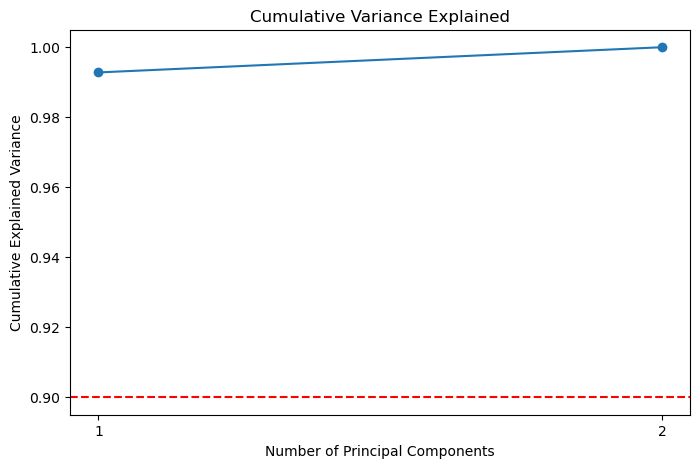

In [26]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [27]:
df_pca_2 = pca.transform(df_scaled2)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_2, np.zeros((df_pca_2.shape[0], df_scaled2.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled2 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0072


In [28]:
df_scaled2

array([[-0.38915988, -0.5165461 ],
       [-0.42637763, -0.45010428],
       [-0.45495682, -0.45814614],
       ...,
       [-0.38996362, -0.49286184],
       [-0.41288062, -0.42836215],
       [-0.46818749, -0.39247968]])

In [29]:
df_pca2 = pd.DataFrame(principal_component2, columns=['smo_obe'])

df_final = pd.concat([df_final, df_pca2], axis=1)
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,excessive_drinking,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,smo_obe_dia,smo_obe
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,-0.819402,-0.640431
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,-0.761500,-0.619766
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,-0.771279,-0.645661
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,-0.786093,-0.659703
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,-0.776276,-0.638044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,-0.767989,-0.626229
872,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,-0.763790,-0.620320
873,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,-0.773654,-0.624252
874,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,-0.722240,-0.594848


In [30]:
df_final.smo_obe.max(),df_final.smo_obe.min()

(8.177217079936645, -1.070729103552792)

In [31]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,excessive_drinking,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,smo_obe_dia,smo_obe
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,-0.819402,-0.640431
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,-0.761500,-0.619766
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,-0.771279,-0.645661
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,-0.786093,-0.659703
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,-0.776276,-0.638044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,-0.767989,-0.626229
872,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,-0.763790,-0.620320
873,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,-0.773654,-0.624252
874,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,-0.722240,-0.594848


## 2 factors: smoking + diabetes

In [32]:
numeric_cols3 = ['adult_smoking', 'diabetes_prevalence']

scaler = StandardScaler()
df_scaled3 = scaler.fit_transform(df[numeric_cols3]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled3)
pca3 = PCA(n_components=1)#
principal_component3 = pca3.fit_transform(df_scaled3)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 98.96% of the variance.


In [33]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


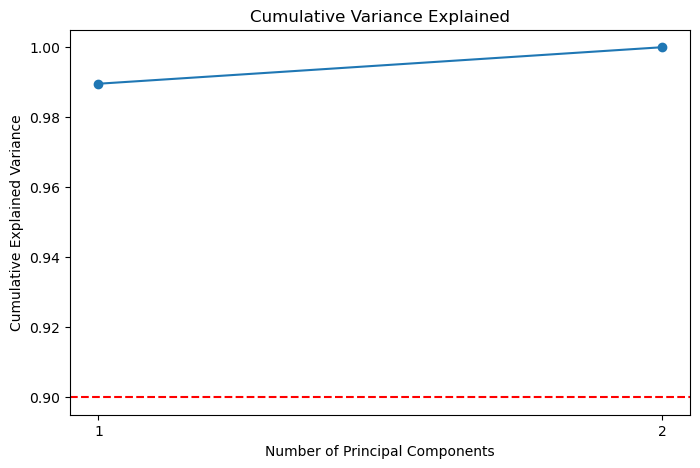

In [34]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()

In [35]:
df_pca_3 = pca.transform(df_scaled3)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_3, np.zeros((df_pca_3.shape[0], df_scaled3.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled3 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0104


In [36]:
df_scaled3

array([[-0.38915988, -0.5132418 ],
       [-0.42637763, -0.44242149],
       [-0.45495682, -0.42278955],
       ...,
       [-0.38996362, -0.45694526],
       [-0.41288062, -0.4096818 ],
       [-0.46818749, -0.44028148]])

In [37]:
df_pca3 = pd.DataFrame(principal_component3, columns=['smo_dia'])

df_final = pd.concat([df_final, df_pca3], axis=1)
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,excessive_drinking,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,smo_obe_dia,smo_obe,smo_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,-0.819402,-0.640431,-0.638094
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,-0.761500,-0.619766,-0.614334
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,-0.771279,-0.645661,-0.620660
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,-0.786093,-0.659703,-0.625843
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,-0.776276,-0.638044,-0.610623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,-0.767989,-0.626229,-0.601936
872,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,-0.763790,-0.620320,-0.595943
873,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,-0.773654,-0.624252,-0.598855
874,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,-0.722240,-0.594848,-0.581639


In [38]:
df_final.smo_dia.max(),df_final.smo_dia.min()

(8.498558447619532, -1.0267076422009034)

In [39]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,excessive_drinking,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,smo_obe_dia,smo_obe,smo_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,-0.819402,-0.640431,-0.638094
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,-0.761500,-0.619766,-0.614334
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,-0.771279,-0.645661,-0.620660
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,-0.786093,-0.659703,-0.625843
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,-0.776276,-0.638044,-0.610623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,-0.767989,-0.626229,-0.601936
872,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,-0.763790,-0.620320,-0.595943
873,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,-0.773654,-0.624252,-0.598855
874,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,-0.722240,-0.594848,-0.581639


## 2 factors: obesity + diabetes

In [40]:
numeric_cols4 = ['adult_obesity', 'diabetes_prevalence']

scaler = StandardScaler()
df_scaled4 = scaler.fit_transform(df[numeric_cols4]) # scales each column (feature) independently to have a mean of 0 and a standard deviation of 1
#df_scaled
pca = PCA()#n_components=1
principal_component = pca.fit_transform(df_scaled4)
pca4 = PCA(n_components=1)#
principal_component4 = pca4.fit_transform(df_scaled4)

explained_variance = pca.explained_variance_ratio_
print(f"PC1 explains {explained_variance[0] * 100:.2f}% of the variance.")

PC1 explains 99.64% of the variance.


In [41]:
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Scree Plot')
# plt.show()


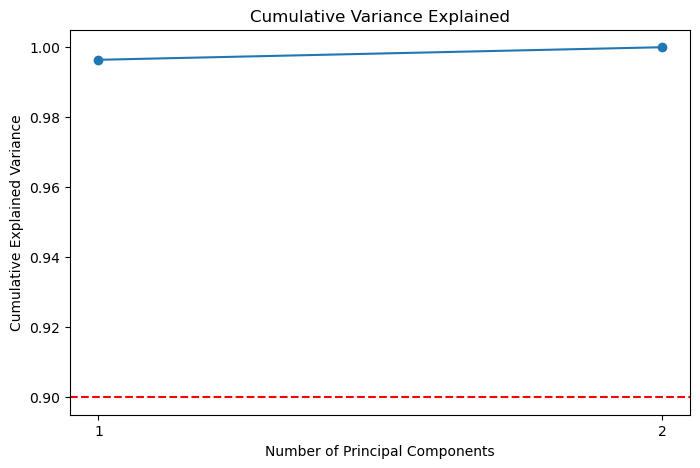

In [42]:
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--')  # Mark 90% threshold
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1), range(1, len(cumulative_variance) + 1))
#plt.savefig(f"{intermediate_dir}cum_variance_explained.png")
plt.show()


In [43]:
df_pca_4 = pca.transform(df_scaled4)[:, :1]  # Keep only PC1
df_reconstructed = pca.inverse_transform(np.hstack([df_pca_4, np.zeros((df_pca_4.shape[0], df_scaled4.shape[1] - 1))]))
reconstruction_error = np.mean((df_scaled4 - df_reconstructed) ** 2)

print(f"Reconstruction error using only PC1: {reconstruction_error:.4f}")


Reconstruction error using only PC1: 0.0036


In [44]:
df_scaled4

array([[-0.5165461 , -0.5132418 ],
       [-0.45010428, -0.44242149],
       [-0.45814614, -0.42278955],
       ...,
       [-0.49286184, -0.45694526],
       [-0.42836215, -0.4096818 ],
       [-0.39247968, -0.44028148]])

In [45]:
df_pca4 = pd.DataFrame(principal_component4, columns=['obe_dia'])

df_final = pd.concat([df_final, df_pca4], axis=1)
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,excessive_drinking,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,smo_obe_dia,smo_obe,smo_dia,obe_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,-0.819402,-0.640431,-0.638094,-0.728170
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,-0.761500,-0.619766,-0.614334,-0.631111
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,-0.771279,-0.645661,-0.620660,-0.622916
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,-0.786093,-0.659703,-0.625843,-0.639924
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,-0.776276,-0.638044,-0.610623,-0.652623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,-0.767989,-0.626229,-0.601936,-0.652785
872,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,-0.763790,-0.620320,-0.595943,-0.654364
873,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,-0.773654,-0.624252,-0.598855,-0.671615
874,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,-0.722240,-0.594848,-0.581639,-0.592587


In [46]:
df_final.obe_dia.max(),df_final.obe_dia.min()

(9.003752772012305, -1.0229700154178443)

In [47]:
df_final = df_final.dropna()
df_final

,Year,cbsacode,Sample_Size,Data_value,Data_value_unit,population_raw,under_18_pct,excessive_drinking,no_leisure_time_activity,some_college,unemployment,children_single_parent,mental_health_providers,median_household_income,driving_alone_to_work,sti,smo_obe_dia,smo_obe,smo_dia,obe_dia
0,2011,10740,2880,21.78,%,857903.0,211769.371000,85547.993919,0.0,143682.0,30309.0,73613.0,174.0,182856.0,303398.0,1239.8,-0.819402,-0.640431,-0.638094,-0.728170
1,2020,10740,1088,19.38,%,915927.0,202255.000171,117863.312052,114913.0,160147.0,20144.0,77031.0,3784.0,193896.0,327278.0,2223.1,-0.761500,-0.619766,-0.614334,-0.631111
2,2019,10740,1016,16.87,%,910726.0,204493.000009,115075.252617,106437.0,158238.0,24275.0,79079.0,3620.0,191069.0,324496.0,2079.2,-0.771279,-0.645661,-0.620660,-0.622916
3,2018,10740,1308,18.17,%,909906.0,207204.999990,114501.104879,113283.0,157389.0,25775.0,81469.0,3487.0,189386.0,321984.0,2093.8,-0.786093,-0.659703,-0.625843,-0.639924
4,2017,10740,1440,22.02,%,907301.0,208968.999992,97792.854210,108484.0,155881.0,25644.0,83469.0,3334.0,189048.0,317893.0,1719.1,-0.776276,-0.638044,-0.610623,-0.652623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2013,49340,609,22.19,%,801227.0,184567.999979,127031.754004,0.0,138483.0,32627.0,52089.0,482.0,60396.0,315829.0,271.0,-0.767989,-0.626229,-0.601936,-0.652785
872,2012,49340,601,19.26,%,803701.0,189673.436000,123419.540364,0.0,138687.0,38039.0,51058.0,447.0,61079.0,313894.0,242.5,-0.763790,-0.620320,-0.595943,-0.654364
873,2011,49340,468,17.60,%,803701.0,189673.436000,122191.485236,0.0,139705.0,37408.0,51125.0,447.0,66389.0,318623.0,206.2,-0.773654,-0.624252,-0.598855,-0.671615
874,2021,49340,302,20.31,%,830622.0,173394.999992,145142.335681,138887.0,141565.0,14139.0,39114.0,4325.0,77795.0,330370.0,337.6,-0.722240,-0.594848,-0.581639,-0.592587


In [49]:
df_final.sort_values(by=['Year', 'cbsacode'], ascending=True).to_csv(f"{intermediate_dir}{today}agg_all.csv", index=False)